# 911 Calls Capstone Project

For this project I will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

____
** Importing numpy and pandas **

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

** Importing visualization libraries and setting %matplotlib inline. **

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

** Reading the csv file as a dataframe called df **

In [4]:
df=pd.read_csv('911.csv')

In [63]:
#to see the data completely
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

** Checking the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Checking the head of df **

In [25]:
df['desc'].ix[0]

'REINDEER CT & DEAD END;  NEW HANOVER; Station 332; 2015-12-10 @ 17:10:52;'

## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [8]:
df.groupby(by='zip').count()['e'].sort_values(ascending=False).head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: e, dtype: int64

### Analyzing the place where highest 911 calls are made

In [5]:
df[df['zip']==19401].head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
18,40.114239,-75.338508,PENN ST & ARCH ST; NORRISTOWN; Station 308A; ...,19401.0,EMS: VEHICLE ACCIDENT,2015-12-10 17:47:01,NORRISTOWN,PENN ST & ARCH ST,1
20,40.114239,-75.338508,PENN ST & ARCH ST; NORRISTOWN; 2015-12-10 @ 17...,19401.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:47:02,NORRISTOWN,PENN ST & ARCH ST,1
32,40.129398,-75.332213,PINE ST & W ROBERTS ST; NORRISTOWN; Station 3...,19401.0,EMS: UNKNOWN MEDICAL EMERGENCY,2015-12-10 18:22:00,NORRISTOWN,PINE ST & W ROBERTS ST,1


** What are the top 5 townships (twp) for 911 calls? **

In [10]:
df.groupby('twp').count()['lat'].sort_values(ascending=False).head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: lat, dtype: int64

** How many unique title codes are there? **

In [19]:
#total enteries are 99492
df['title'].nunique()

110

In [5]:
# These are the reasons to call the 911 !!
df['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM', 'EMS: ABDOMINAL PAINS',
       'Fire: PUMP DETAIL', 'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE',
       'EMS: MATERNITY', 'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING',
       'EMS: LACERATIONS', 'Fire

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Using .apply() with a custom lambda expression a new column called "Reason" is created.** 

In [81]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [7]:
# This is how the split would be done considering all the values as a series and string
df.title.str.split(':').head()

0     [EMS,  BACK PAINS/INJURY]
1    [EMS,  DIABETIC EMERGENCY]
2        [Fire,  GAS-ODOR/LEAK]
3     [EMS,  CARDIAC EMERGENCY]
4             [EMS,  DIZZINESS]
Name: title, dtype: object

In [6]:
df[['desc','Reason']].head(10)

,desc,Reason
0,REINDEER CT & DEAD END; NEW HANOVER; Station ...,EMS
1,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,EMS
2,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,Fire
3,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,EMS
4,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,EMS
5,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,EMS
6,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,EMS
7,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,EMS
8,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,EMS
9,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,Traffic


** What is the most common Reason for a 911 call based off of this new column? **

In [7]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Using seaborn to create a countplot of 911 calls by Reason. **

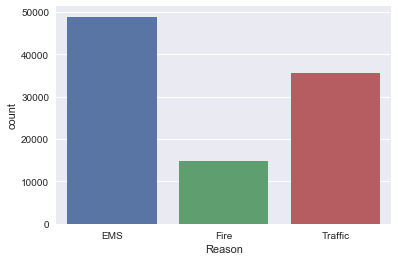

In [29]:
sns.countplot(x='Reason',data=df)

In [49]:
df[df['Reason']=='Traffic'].head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic
10,40.231990,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,MONTGOMERY,RT202 PKWY & KNAPP RD,1,Traffic
11,40.084161,-75.308386,BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ ...,19428.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,PLYMOUTH,BROOK RD & COLWELL LN,1,Traffic
12,40.174131,-75.098491,BYBERRY AVE & S WARMINSTER RD; UPPER MORELAND;...,19040.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,UPPER MORELAND,BYBERRY AVE & S WARMINSTER RD,1,Traffic
13,40.062974,-75.135914,OLD YORK RD & VALLEY RD; CHELTENHAM; 2015-12-1...,19027.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,CHELTENHAM,OLD YORK RD & VALLEY RD,1,Traffic


### Within the reason of Traffic (Total = 35695), lets find which of them were due to disabled vehicle and which were due to an accident

In [74]:
def accident(x):
    if 'accident' in x.lower():
        return True
    else:
        return False
df[df['title'].apply(lambda x: accident(x))].head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic
10,40.231990,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,MONTGOMERY,RT202 PKWY & KNAPP RD,1,Traffic
11,40.084161,-75.308386,BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ ...,19428.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,PLYMOUTH,BROOK RD & COLWELL LN,1,Traffic
12,40.174131,-75.098491,BYBERRY AVE & S WARMINSTER RD; UPPER MORELAND;...,19040.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,UPPER MORELAND,BYBERRY AVE & S WARMINSTER RD,1,Traffic
13,40.062974,-75.135914,OLD YORK RD & VALLEY RD; CHELTENHAM; 2015-12-1...,19027.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,CHELTENHAM,OLD YORK RD & VALLEY RD,1,Traffic


In [42]:
#So the total Traffic emergencies due to the reason of Vehical Accident are = 28642
df[df['title'].apply(lambda x: accident(x))]['Reason'].count()

28642

In [86]:
def accident2(x):
    if 'disabled' in x.lower():
        return True
    else:
        return False
df[df['title'].apply(lambda x: accident2(x))].head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
19,40.209337,-75.135266,COUNTY LINE RD & WILLOW DR; HORSHAM; 2015-12-1...,18974.0,Traffic: DISABLED VEHICLE -,2015-12-10 17:47:02,HORSHAM,COUNTY LINE RD & WILLOW DR,1,Traffic
21,40.117948,-75.209848,CHURCH RD & REDCOAT DR; WHITEMARSH; 2015-12-10...,19031.0,Traffic: DISABLED VEHICLE -,2015-12-10 17:57:02,WHITEMARSH,CHURCH RD & REDCOAT DR,1,Traffic
23,40.143326,-75.422819,RT422 & PAWLINGS RD OVERPASS; LOWER PROVIDENC...,NaN,Traffic: DISABLED VEHICLE -,2015-12-10 18:02:02,LOWER PROVIDENCE,RT422 & PAWLINGS RD OVERPASS,1,Traffic
29,40.209337,-75.135266,COUNTY LINE RD & WILLOW DR; HORSHAM; 2015-12-1...,18974.0,Traffic: DISABLED VEHICLE -,2015-12-10 18:11:01,HORSHAM,COUNTY LINE RD & WILLOW DR,1,Traffic
33,40.297876,-75.581294,; NEW HANOVER; 2015-12-10 @ 18:20:28;,19525.0,Traffic: DISABLED VEHICLE -,2015-12-10 18:22:01,NEW HANOVER,NaN,1,Traffic


In [48]:
#So the total Traffic emergencies due to the reason of Vehical Accident are = 28642
df[df['title'].apply(lambda x: accident2(x))]['Reason'].count()

7703

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [5]:
df['timeStamp'].head()

0    2015-12-10 17:40:00
1    2015-12-10 17:40:00
2    2015-12-10 17:40:00
3    2015-12-10 17:40:01
4    2015-12-10 17:40:01
Name: timeStamp, dtype: object

** Using [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [4]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [5]:
df['timeStamp'].head()

0   2015-12-10 17:40:00
1   2015-12-10 17:40:00
2   2015-12-10 17:40:00
3   2015-12-10 17:40:01
4   2015-12-10 17:40:01
Name: timeStamp, dtype: datetime64[ns]

In [6]:
x=df['timeStamp'].iloc[1]
x.hour

17

**Creating new columns based on the information from the timeStamp**

In [31]:
x=df['timeStamp'].iloc[1]
x.weekday()

3

In [7]:
df['Month']=df['timeStamp'].apply(lambda x: x.month)
df['Day']=df['timeStamp'].apply(lambda x: x.day)
df['WeekDay']=df['timeStamp'].apply(lambda x: x.weekday())

** Using the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [8]:
df['weekday']=df['WeekDay'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

In [82]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Month,Day,WeekDay,weekday,Date,Hour,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,12,Thu,3,Thu,2015-12-10,17,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,12,Thu,3,Thu,2015-12-10,17,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,12,Thu,3,Thu,2015-12-10,17,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,12,Thu,3,Thu,2015-12-10,17,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,12,Thu,3,Thu,2015-12-10,17,EMS


** Using seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

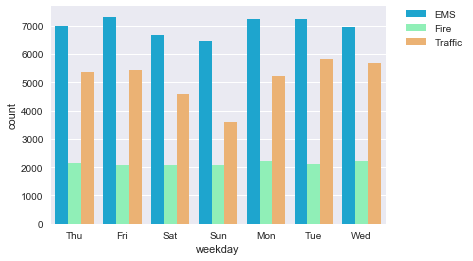

In [84]:
sns.countplot(x='weekday', hue='Reason',data=df, orient='best', palette='rainbow')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Now do the same for Month:**

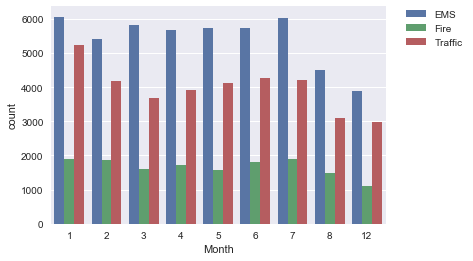

In [85]:
sns.countplot(x='Month',hue='Reason',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

** It is noticed that the plot was missing some Months, let's use a simple line plot that fills in the missing months **

** Now creating a gropuby object called byMonth, where I group the DataFrame by the month column and use the count() method for aggregation. Using the head() method on this returned DataFrame. **

In [87]:
grp=df.groupby(by='Month')['lat'].count()

In [88]:
grp

Month
1     13205
2     11467
3     11101
4     11326
5     11423
6     11786
7     12137
8      9078
12     7969
Name: lat, dtype: int64

** Now creating a simple plot off of the dataframe indicating the count of calls per month. **

([<matplotlib.axis.XTick at 0x227e69e08d0>,
 <a list of 12 Text xticklabel objects>)

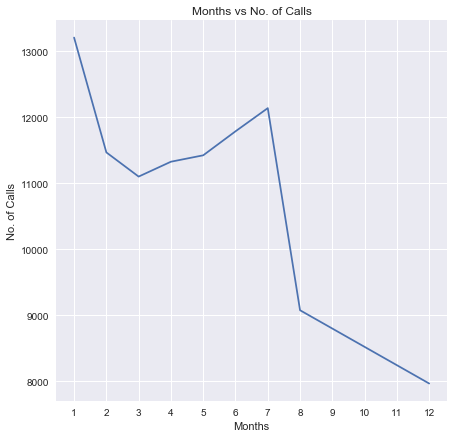

In [114]:
plt.figure(figsize=(7,7))
plt.plot(grp)
plt.xlabel('Months')
plt.ylabel('No. of Calls')
plt.title('Months vs No. of Calls')
plt.xticks(np.arange(1,13))

** Using seaborn's lmplot() to create a linear fit on the number of calls per month. **

In [115]:
grp=grp.reset_index()
grp

,Month,lat
0,1,13205
1,2,11467
2,3,11101
3,4,11326
4,5,11423
5,6,11786
6,7,12137
7,8,9078
8,12,7969


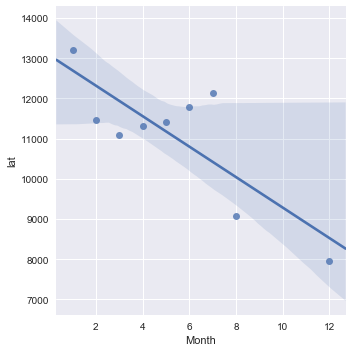

In [33]:
sns.lmplot(x='Month',y='lat',data=grp)

**Creating a new column called 'Date' that contains the date from the timeStamp column. Using apply along with the .date() method. ** 

In [136]:
df.ix[1:3,:]

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Month,Day,WeekDay,weekday,Date,Hour,Reason
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,12,Thu,3,Thu,2015-12-10,17,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,12,Thu,3,Thu,2015-12-10,17,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,12,Thu,3,Thu,2015-12-10,17,EMS


In [10]:
df['Date']=df['timeStamp'].apply(lambda x:x.date())
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Month,Day,WeekDay,weekday,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,12,10,3,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,12,10,3,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,12,10,3,Thu,2015-12-10


** Now grouping the Date column with the count() aggregate to create a plot of counts of 911 calls.**

In [146]:
grp2=df.groupby(by='Date')['lat'].count()
grp2.head()

Date
2015-12-10    115
2015-12-11    396
2015-12-12    403
2015-12-13    319
2015-12-14    447
Name: lat, dtype: int64

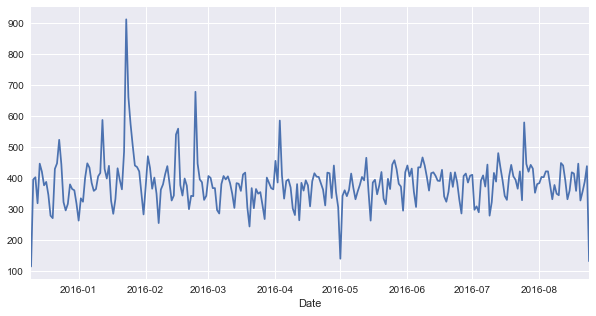

In [148]:
plt.figure(figsize=(10,5))
grp2.plot.line()
plt.savefig('Desktop/lineplot.jpg')

** Recreating 3 separate plots with each plot representing a Reason for the 911 call**

In [150]:
grp4=df[df['Reason']=='Traffic'].groupby(['Date'])['twp'].count()

In [151]:
grp4.head()

Date
2015-12-10     43
2015-12-11    141
2015-12-12    146
2015-12-13     78
2015-12-14    186
Name: twp, dtype: int64

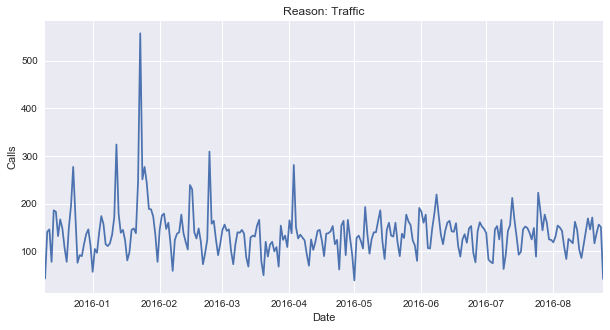

In [154]:
plt.figure(figsize=(10,5))
grp4.plot.line()
plt.ylabel('Calls')
plt.title('Reason: Traffic')

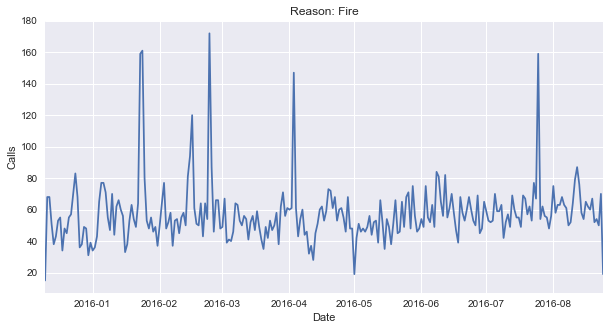

In [155]:
# Fire
plt.figure(figsize=(10,5))
df[df['Reason']=='Fire'].groupby('Date')['twp'].count().plot.line()
plt.ylabel('Calls')
plt.title('Reason: Fire')

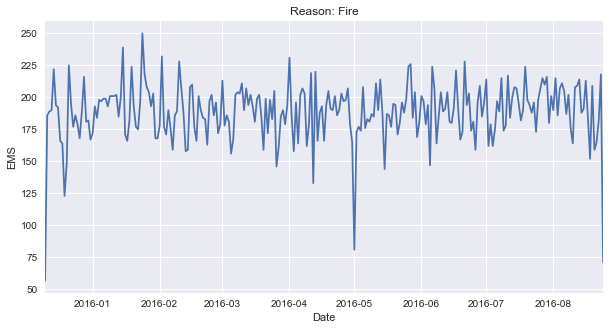

In [156]:
plt.figure(figsize=(10,5))
df[df['Reason']=='EMS'].groupby('Date')['twp'].count().plot.line()
plt.ylabel('EMS')
plt.title('Reason: Fire')

____
** Creating  heatmaps with seaborn and our data. Restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. I would be using the Grouping and unstack() method to form the Matrix.**

In [35]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Month,Day,WeekDay,weekday,Date,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,12,Thu,3,Thu,2015-12-10,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,12,Thu,3,Thu,2015-12-10,17


In [158]:
unstck=df.groupby(['weekday', 'Hour']).count()['lat'].unstack()
unstck

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


** Creating a HeatMap using this new DataFrame. **

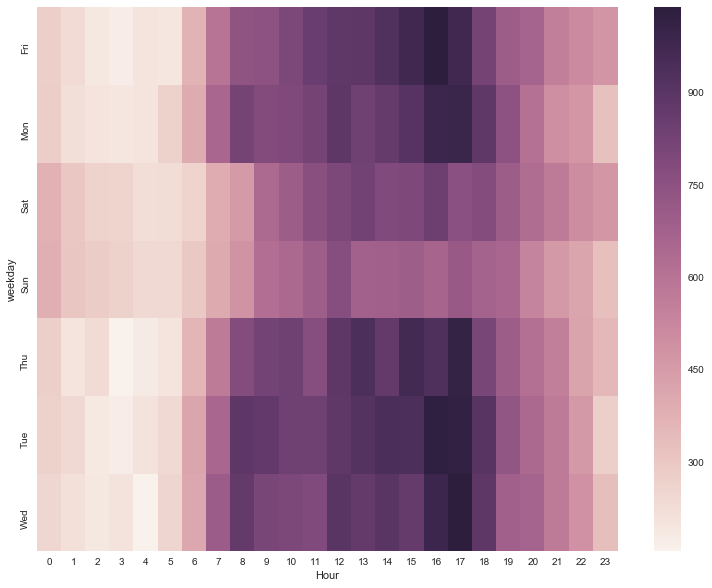

In [159]:
plt.figure(figsize=(13,10))
sns.heatmap(unstck)

** Clustermap using this DataFrame. Heirarchical Clustering Learning is used to obtain the visualization**

C:\Users\desai\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


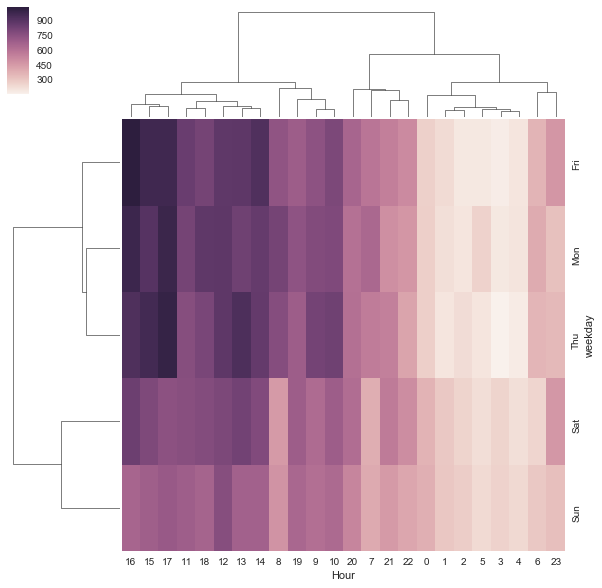

In [63]:
sns.clustermap(unstck)

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [65]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Month,Day,WeekDay,weekday,Date,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,12,Thu,3,Thu,2015-12-10,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,12,Thu,3,Thu,2015-12-10,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,12,Thu,3,Thu,2015-12-10,17


In [160]:
mon=df.groupby(['Month','weekday']).count()['lat'].unstack(0)
mon

Month,1,2,3,4,5,6,7,8,12
weekday,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


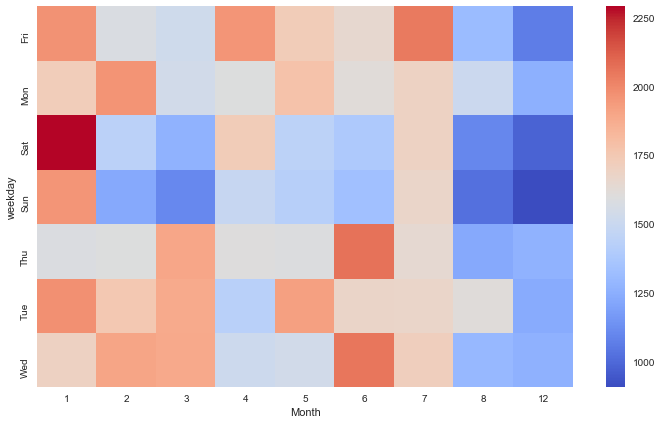

In [164]:
plt.figure(figsize=(12,7))
sns.heatmap(mon, cmap='coolwarm')

C:\Users\desai\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


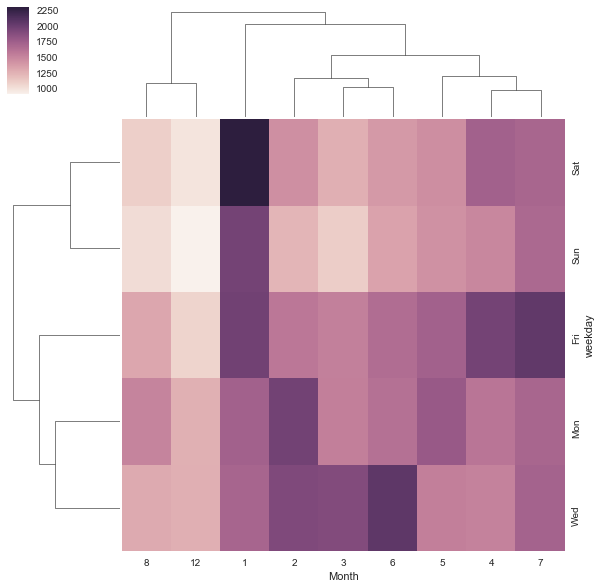

In [79]:
sns.clustermap(mon)